In [1]:
%cd /kaggle/working

import polars as pl

/kaggle/working


In [11]:
sample_df = pl.read_parquet(
    "input/train.parquet", n_rows=1000000, columns=["ptend_q0002_13"]
)

In [12]:
y133_df = sample_df.with_row_index().select(["index", "ptend_q0002_13"])

In [13]:
y133_df.describe(percentiles=[0.01, 0.05, 0.95, 0.99])

statistic,index,ptend_q0002_13
str,f64,f64
"""count""",1e6,1e6
"""null_count""",0.0,0.0
"""mean""",499999.5,-5.6378e-46
"""std""",288675.278932,3.1882e-45
"""min""",0.0,-1.8047e-43
"""1%""",10000.0,-1.2300e-44
"""5%""",50000.0,-2.3002e-45
"""95%""",949999.0,-1.7166e-52
"""99%""",989999.0,0.0


In [16]:
filter_df = y133_df.filter(pl.col("ptend_q0002_13") < -1.2300e-44)

In [17]:
filter_df

index,ptend_q0002_13
u32,f64
322092,-1.4236e-44
322860,-1.7085e-44
323244,-1.4233e-44
323628,-1.7639e-44
324012,-2.7008e-44
…,…
992171,-1.8761e-44
992934,-1.3808e-44
995241,-1.2661e-44


<Axes: xlabel='index', ylabel='ptend_q0002_13'>

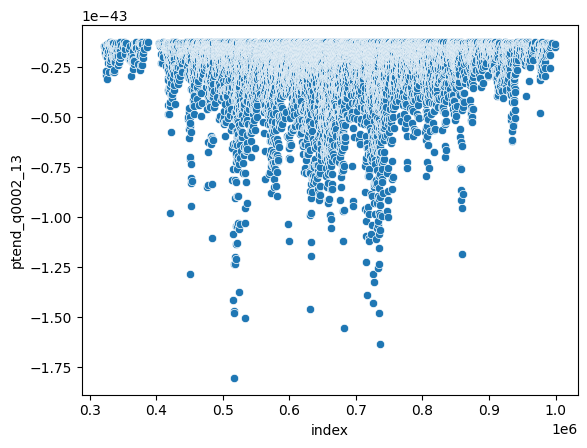

In [26]:
import seaborn as sns
sns.scatterplot(data=filter_df, x="index", y="ptend_q0002_13")